# NB2.2C Linear Regression Challenge

The Diabetes Dataset includes ten baseline varibles obtained from 442 diabetes patients and the variable of interest which is a quantitative measure of disease progression one year after baseline. 

The variables included are: 
* age: age in years.
* sex.
* bmi: body mass index.
* bp: average blood pressure.
* s1: tc, T-Cells (a type of white blood cells).
* s2: ldl, low-density lipoproteins.
* s3: hdl, high-density lipoproteins.
* s4: tch, thyroid stimulating hormone.
* s5: ltg, lamotrigine.
* s6: glu, blood sugar level.

You can load this dataset by using `sklearn.datasets.load_diabetes()` [[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)]. The 10 feature variables have been mean centered and scaled by the standard deviation.  

In this study case, you must the following phases according to the Cross-Industry Standard Process for Data Mining:
* Data Understanding.
* Data Processing
* Modelling

The main goal is to create the best linear model that fits the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, cross_val_score, RepeatedKFold

plt.rcParams["figure.figsize"] = (8,8)

In [2]:
from sklearn.datasets import load_diabetes as import_data

## 1. Data Understanding

**T1** Include in this section, the analysis corresponding to the **Data Understanding**. You can include more cells in case you need it. At the end, write a summary of the findings.

In [3]:
diabetes_raw = import_data()

The `diabetes_raw`object contains several attributes like: data, target, feature_names, DESCR and filename.

In [4]:
# Keys
diabetes_raw.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [5]:
# Dataset Description
print(diabetes_raw.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

#### Comments
We only need the keys: data, target and feature_names

In [6]:
# Creating boston_data, boston_target
diabetes_data = pd.DataFrame(diabetes_raw.data, columns = diabetes_raw.feature_names)
diabetes_data['Disease_progression'] = diabetes_raw.target
diabetes_data.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  Disease_progression  
0 -0.002592  0.019908 -0.017646                151.0  
1 -0.039493 -0.068330 -0.092204                 75.0  
2 -0.002592  0.002864 -0.025930                141.0  
3  0.034309  0.022692 -0.009362                206.0  
4 -0.002592 -0.031991 -0.046641                135.0

## 2. Data Processing

**T2** Include in this section, the analysis corresponding to the **Data Processing**. You can include more cells in case you need it. At the end, write a summary of the findings.

### 2.1 Data Exploration

In [7]:
diabetes_data.describe().T

count          mean        std        min        25%  \
age                  442.0 -3.639623e-16   0.047619  -0.107226  -0.037299   
sex                  442.0  1.309912e-16   0.047619  -0.044642  -0.044642   
bmi                  442.0 -8.013951e-16   0.047619  -0.090275  -0.034229   
bp                   442.0  1.289818e-16   0.047619  -0.112400  -0.036656   
s1                   442.0 -9.042540e-17   0.047619  -0.126781  -0.034248   
s2                   442.0  1.301121e-16   0.047619  -0.115613  -0.030358   
s3                   442.0 -4.563971e-16   0.047619  -0.102307  -0.035117   
s4                   442.0  3.863174e-16   0.047619  -0.076395  -0.039493   
s5                   442.0 -3.848103e-16   0.047619  -0.126097  -0.033249   
s6                   442.0 -3.398488e-16   0.047619  -0.137767  -0.033179   
Disease_progression  442.0  1.521335e+02  77.093005  25.000000  87.000000   

                            50%         75%         max  
age                    0.005383    0.038076    0.110727  
sex                   -0.044642    0.050680    0.050680  
bmi                   -0.007284    0.031248    0.170555  
bp                    -0.005671    0.035644    0.132044  
s1                    -0.004321    0.028358    0.153914  
s2                    -0.003819    0.029844    0.198788  
s3                    -0.006584    0.029312    0.181179  
s4                    -0.002592    0.034309    0.185234  
s5                    -0.001948    0.032433    0.133599  
s6                    -0.001078    0.027917    0.135612  
Disease_progression  140.500000  211.500000  346.000000

In [8]:
# Missing Value
diabetes_data.isnull().sum()

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
Disease_progression    0
dtype: int64

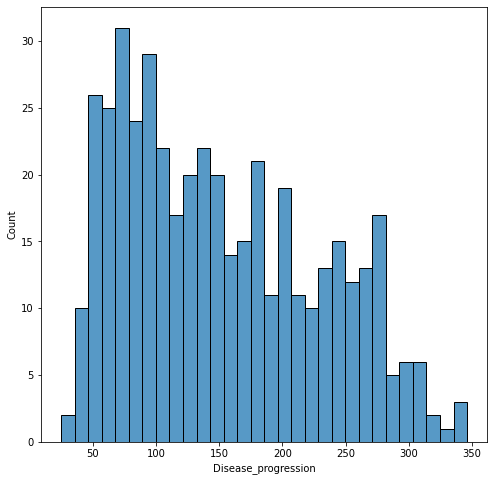

In [9]:
sns.histplot(diabetes_data['Disease_progression'], bins=30)
plt.show()

In [10]:
# Matrix Correlation
corr_matrix = diabetes_data.corr()
corr_matrix.head()

age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp   0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   

           s4        s5        s6  Disease_progression  
age  0.203841  0.270777  0.301731             0.187889  
sex  0.332115  0.149918  0.208133             0.043062  
bmi  0.413807  0.446159  0.388680             0.586450  
bp   0.257653  0.393478  0.390429             0.441484  
s1   0.542207  0.515501  0.325717             0.212022

In [11]:
corr_matrix["Disease_progression"].sort_values(ascending = False, key=lambda x: np.abs(x))

Disease_progression    1.000000
bmi                    0.586450
s5                     0.565883
bp                     0.441484
s4                     0.430453
s3                    -0.394789
s6                     0.382483
s1                     0.212022
age                    0.187889
s2                     0.174054
sex                    0.043062
Name: Disease_progression, dtype: float64

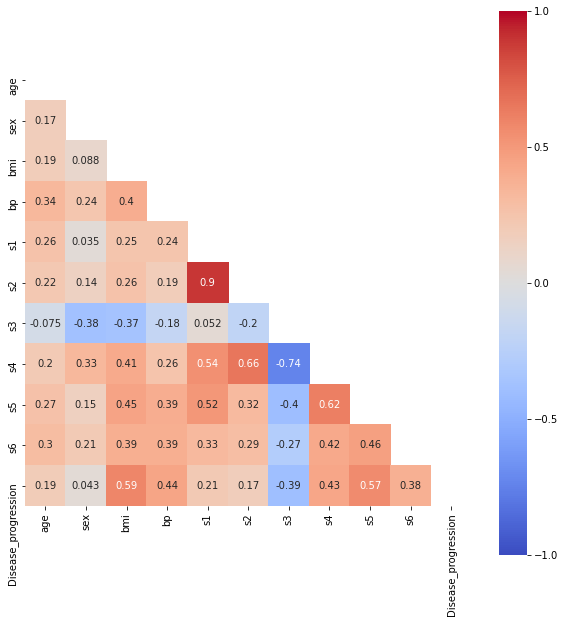

In [12]:
# Mark to Hide Upper Triangle
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Correlation Heatmap

fig, ax = plt.subplots(figsize = (10,10))

heatmap = sns.heatmap(corr_matrix,
                     mask = mask,
                     square = True,
                     cmap = "coolwarm",
                      cbar_kws = {"ticks" : [-1, -0.5, 0, 0.5, 1]},
                     vmin = -1,
                     vmax = 1,
                     annot = True,
                     annot_kws = {"size": 10})

plt.show()

From this map we can notice s1 and s2 are high correlated, therefore, we can dispose of one of those columns

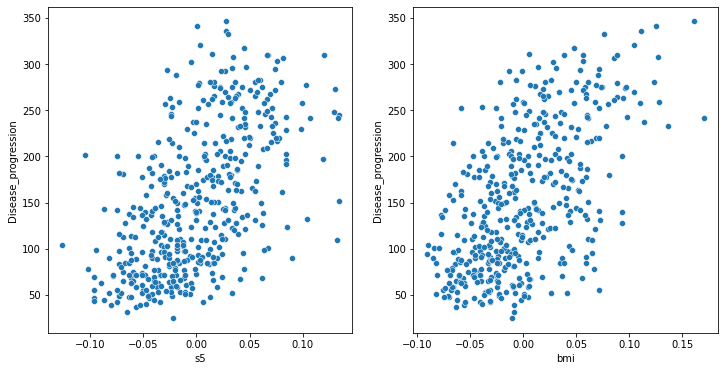

In [13]:
fig, ax = plt.subplots(1,2, figsize = (12,6)) 
sns.scatterplot(x = "s5", y = "Disease_progression", data = diabetes_data, ax = ax[0])
sns.scatterplot(x = "bmi", y = "Disease_progression", data = diabetes_data, ax = ax[1])
plt.show()

### 2.3 Data Preparation

In [14]:
# Standardize features (input variables) by removing the mean and scaling to unit variance
scaler = StandardScaler()
diabetes_data[diabetes_raw.feature_names] = scaler.fit_transform(diabetes_data[diabetes_raw.feature_names])

In [15]:
diabetes_data2 = diabetes_data.copy()

In [16]:
diabetes_data.drop(["s2"], axis = 1, inplace = True)
diabetes_data.head()

age       sex       bmi        bp        s1        s3        s4  \
0  0.800500  1.065488  1.297088  0.459840 -0.929746 -0.912451 -0.054499   
1 -0.039567 -0.938537 -1.082180 -0.553511 -0.177624  1.564414 -0.830301   
2  1.793307  1.065488  0.934533 -0.119218 -0.958674 -0.680245 -0.054499   
3 -1.872441 -0.938537 -0.243771 -0.770658  0.256292 -0.757647  0.721302   
4  0.113172 -0.938537 -0.764944  0.459840  0.082726  0.171178 -0.054499   

         s5        s6  Disease_progression  
0  0.418551 -0.370989                151.0  
1 -1.436551 -1.938479                 75.0  
2  0.060207 -0.545154                141.0  
3  0.477072 -0.196823                206.0  
4 -0.672582 -0.980568                135.0

In [17]:
diabetes_data_model = diabetes_data[[i for i in diabetes_raw.feature_names if i != "s2"]]
diabetes_target_model = diabetes_data["Disease_progression"]

In [18]:
# Train and Test Set
data_train, data_test, target_train, target_test = train_test_split(diabetes_data_model, diabetes_target_model, train_size = .80)

In [19]:
print("Train:", data_train.shape, target_train.shape)
print("Test: ", data_test.shape, target_test.shape)

Train: (353, 9) (353,)
Test:  (89, 9) (89,)


## 3. Modelling

**T3** Include in this section, the analysis corresponding to the **Modelling**. You can include more cells in case you need it. At the end, write a summary of the findings.

In [20]:
lin_reg = linear_model.LinearRegression()

# 2. Model Fit
lin_reg.fit(data_train, target_train)

LinearRegression()

In [21]:
intercept = lin_reg.intercept_
coefficients = lin_reg.coef_

print("w0 = {:5.2f}".format(intercept))

for i in range(1,len(coefficients) + 1):
    print("w{:d} = {:5.2f}".format(i, coefficients[i-1]))

w0 = 153.06
w1 =  0.09
w2 = -11.12
w3 = 26.07
w4 = 15.04
w5 = -10.42
w6 = -6.83
w7 =  8.30
w8 = 23.40
w9 =  4.11


#### Metrics

In [22]:
y_pred = lin_reg.predict(data_train)

In [23]:
print("RMSE: ", np.sqrt(mean_squared_error(target_train, y_pred)))
print("R2: ", r2_score(target_train, y_pred))

RMSE:  53.99870099964274
R2:  0.5231891981389305


In [24]:
y_pred = lin_reg.predict(data_test)

In [25]:
print("RMSE: ", np.sqrt(mean_squared_error(target_test, y_pred)))
print("R2: ", r2_score(target_test, y_pred))

RMSE:  52.311075618793744
R2:  0.4730430546149972


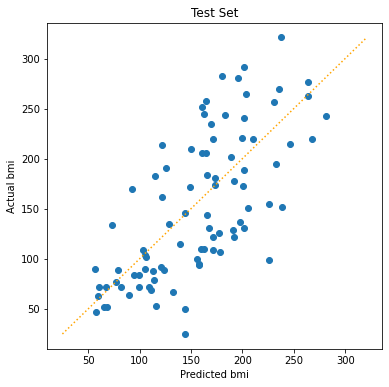

In [26]:
# Prediction vs Actual Value
fig, ax = plt.subplots(figsize = (6,6)) 
ax.set_title("Test Set")
ax.scatter(y_pred, target_test)
ax.set_xlabel("Predicted bmi")
ax.set_ylabel("Actual bmi")
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], ":", color = 'orange')
plt.show()

**T4** Linear Regression Models consider the following assumptions:

* Linearity.
* Multivariate Normality.
* No or little multicollinerity.
* Homoscedasticity.
* Independence or No auto-correlation.

Research about each assumption and how to test them. For each of them include:
* A description of the assumption and how it can be tested.
* Test if your model fulfill all asumptions and include your conclusions.

In [27]:
import itertools

In [28]:
permutations = list(itertools.permutations(diabetes_data.columns, 2))
print("Combinations' number => ", len(permutations))

Combinations' number =>  90


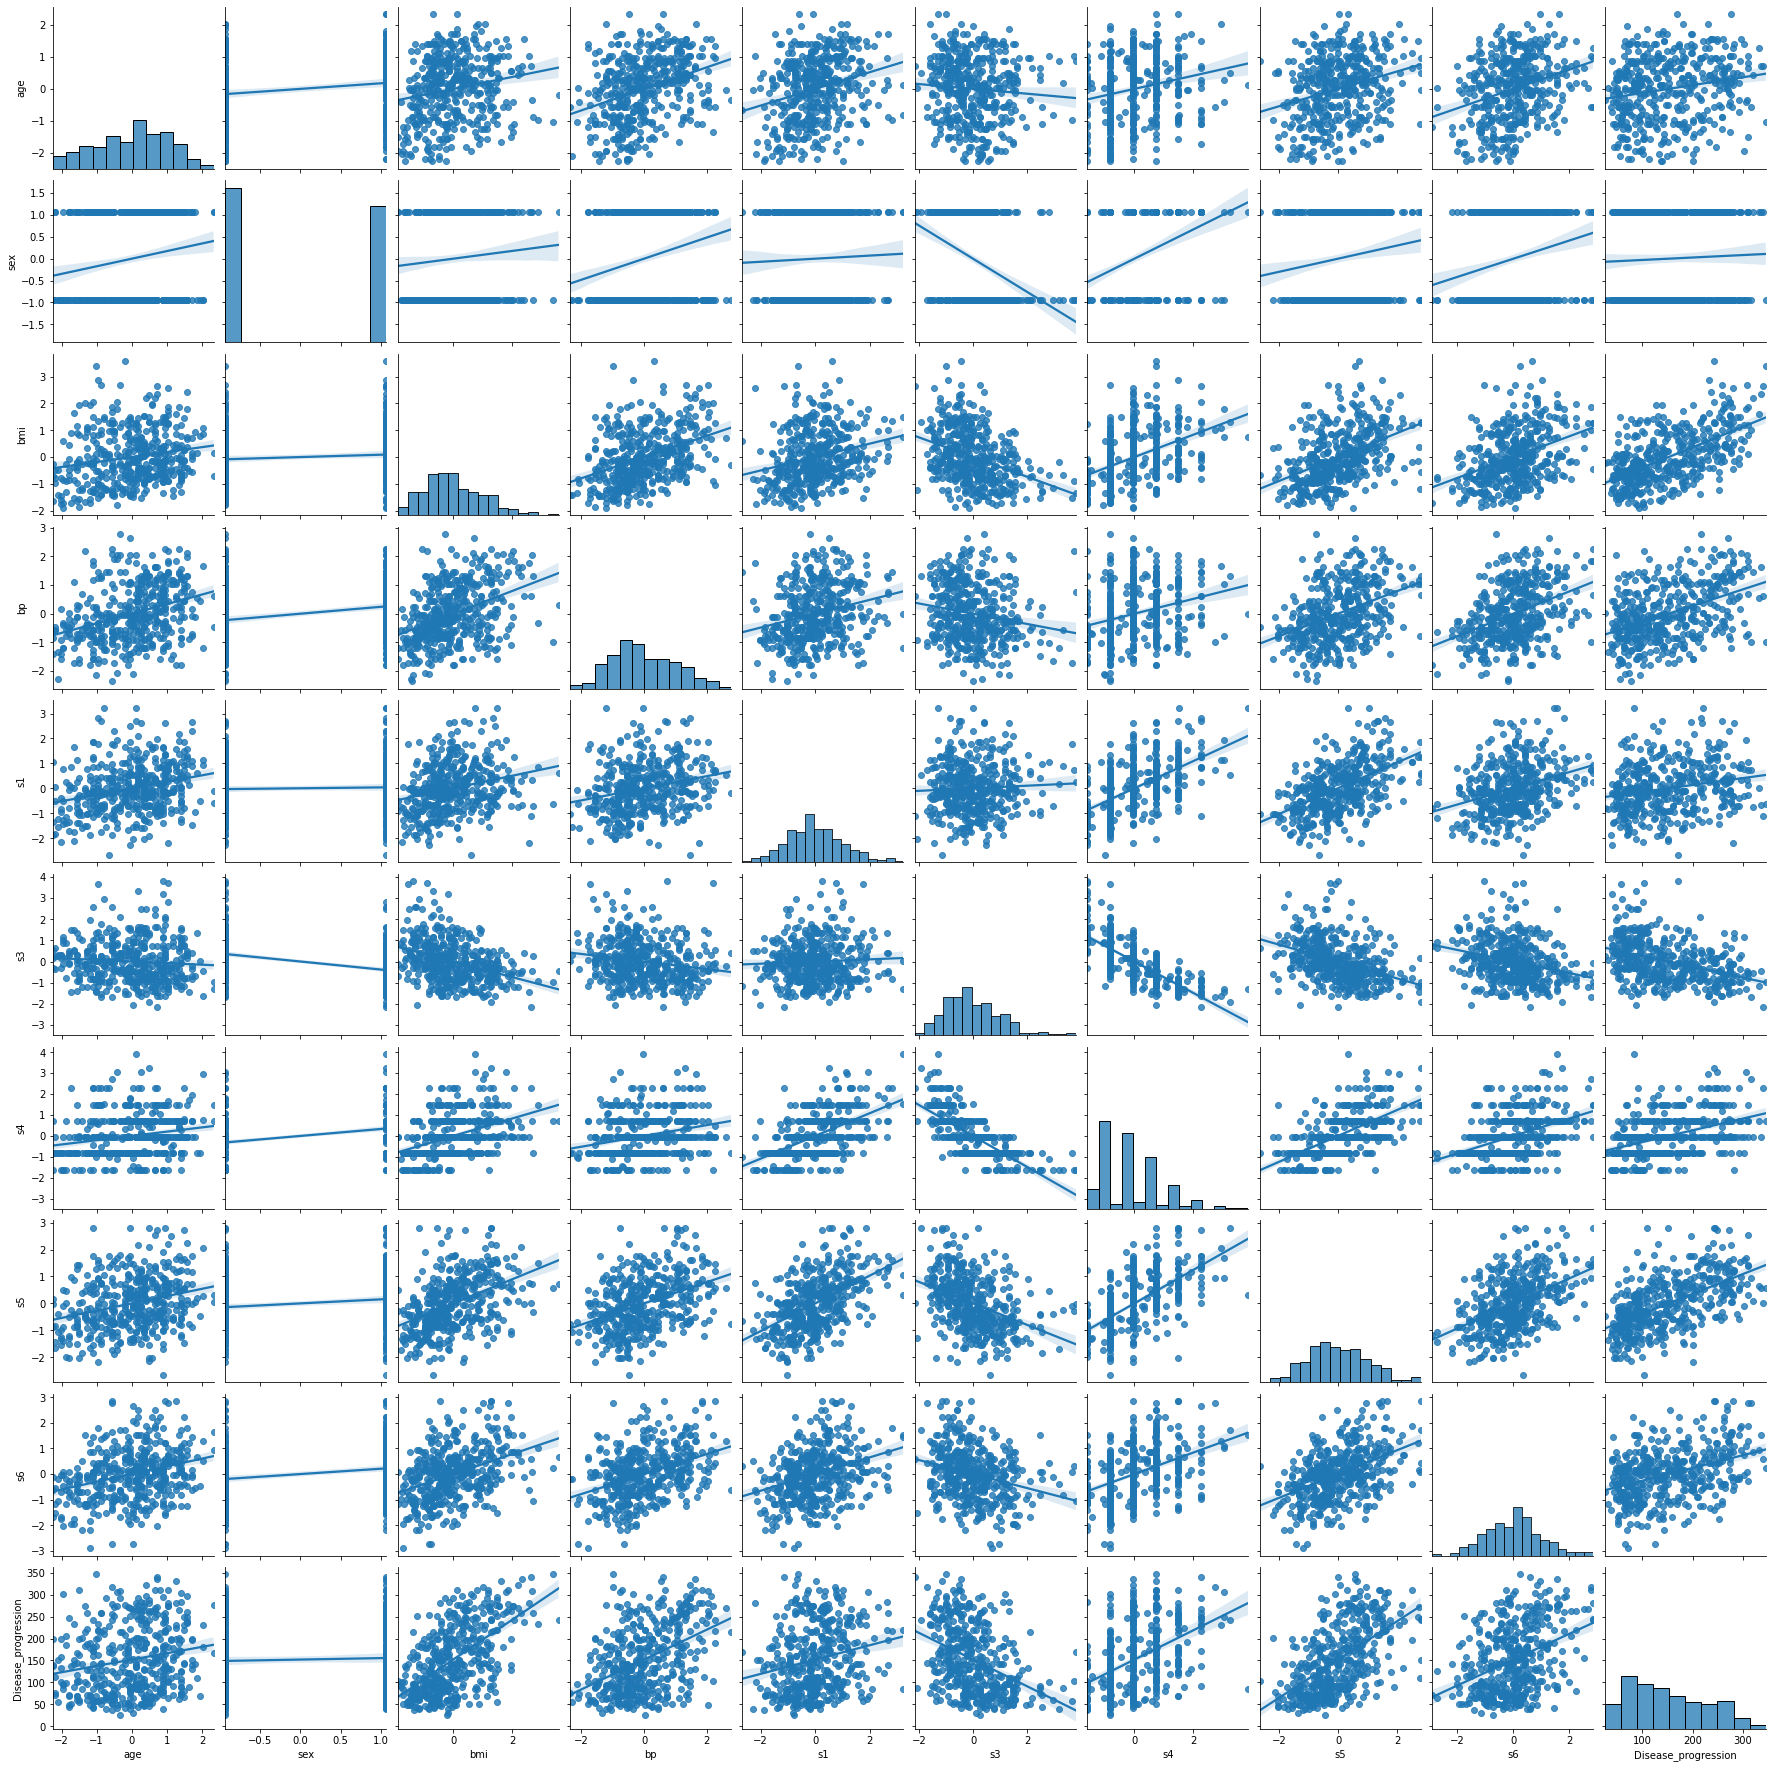

In [29]:
# fig, ax = plt.subplots(nrows=5, ncols=5,)
sns.pairplot(diabetes_data,kind='reg')

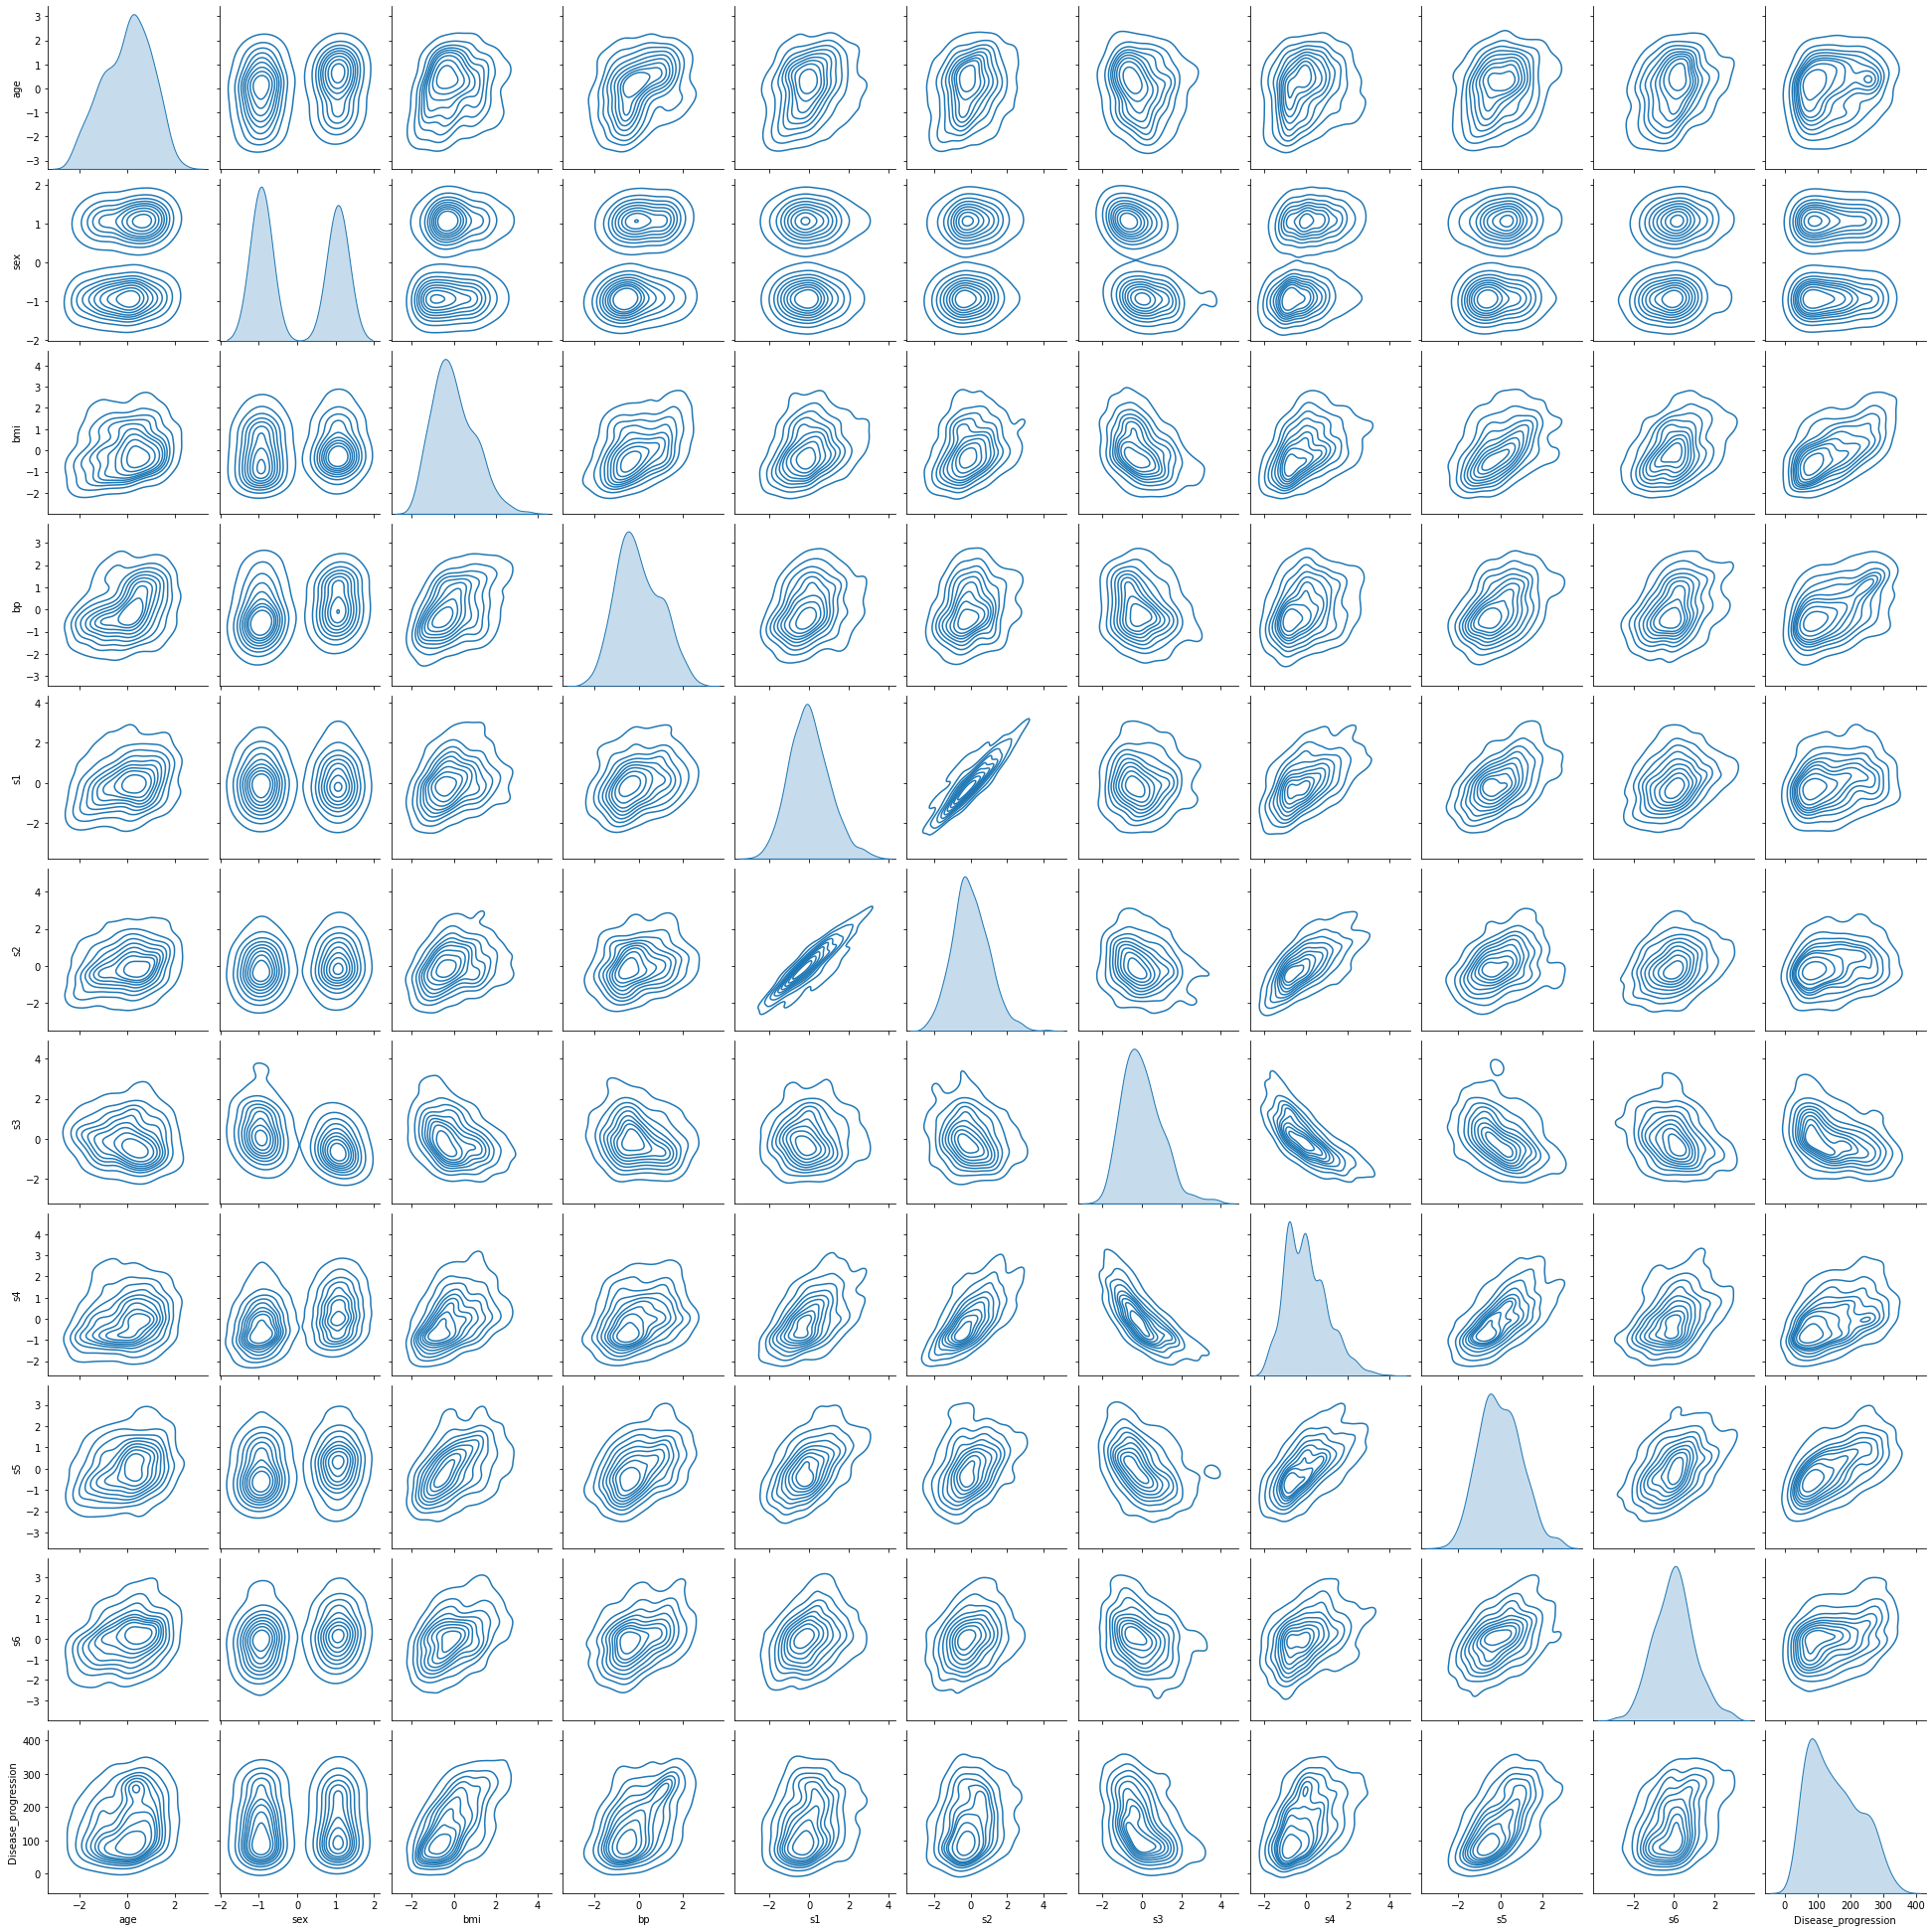

In [30]:
sns.pairplot(diabetes_data2,kind='kde')

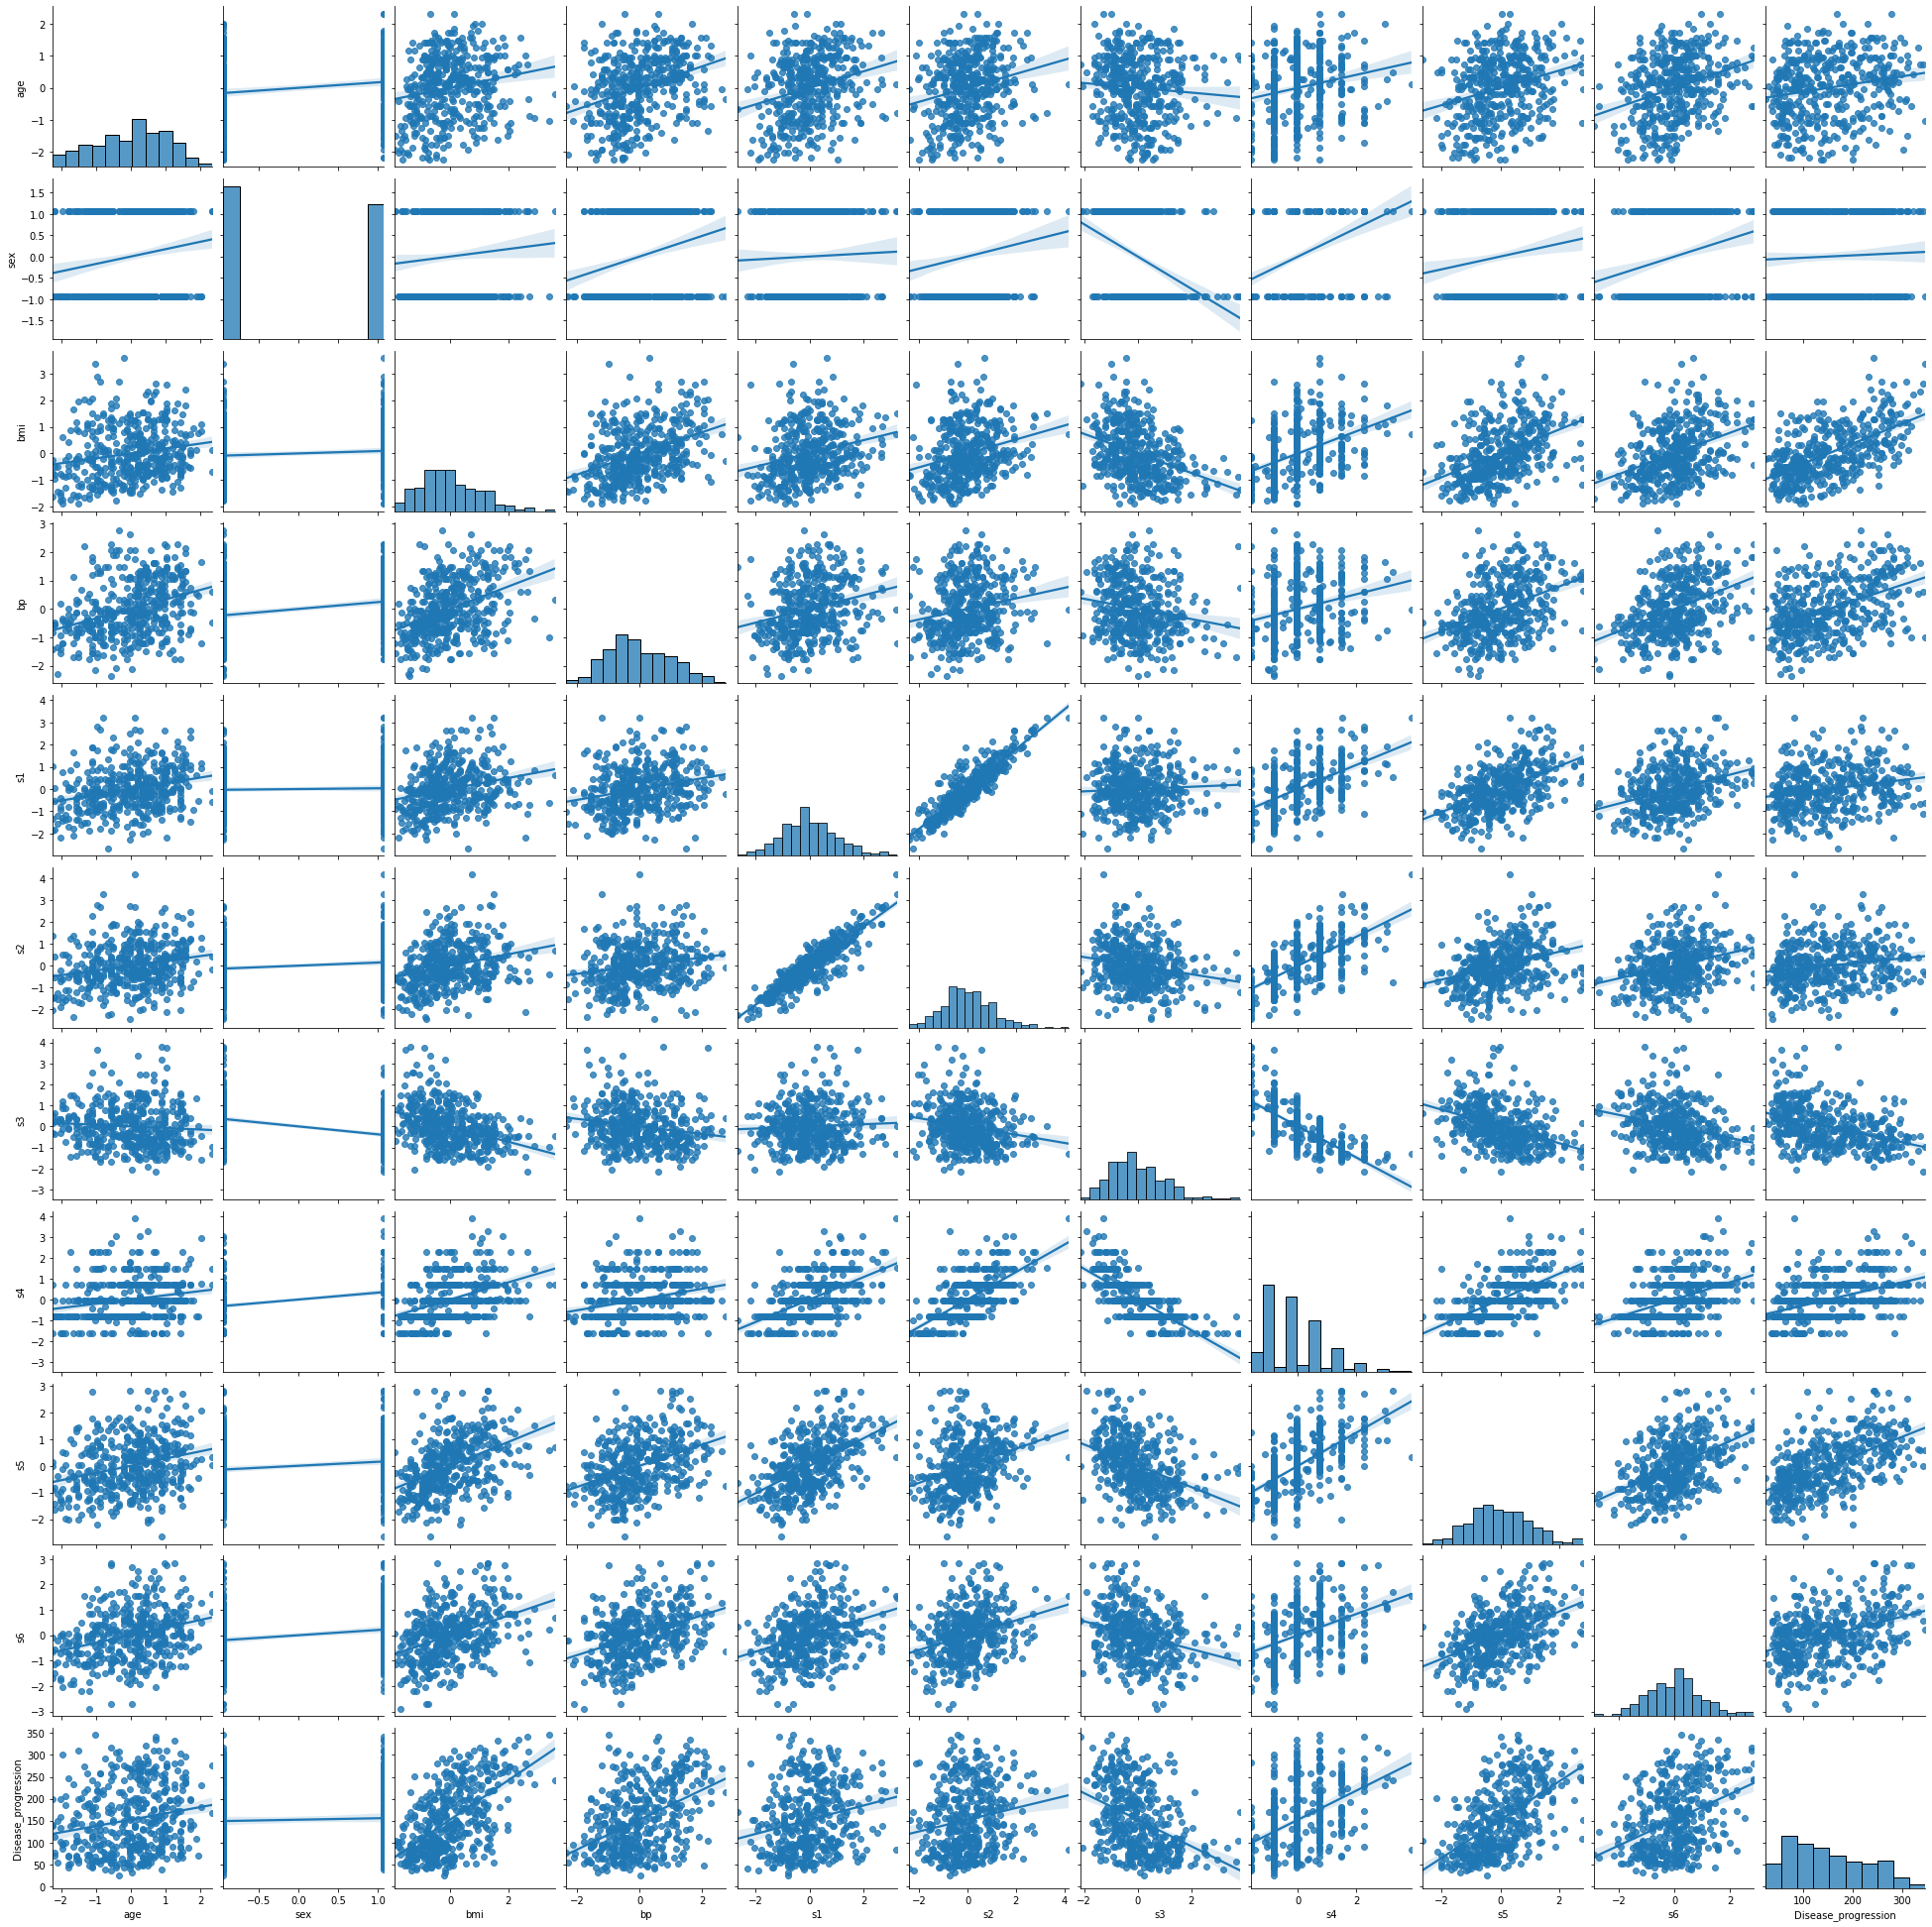

In [31]:
# With S2

sns.pairplot(diabetes_data2,kind='reg')

We can watch some distribution as linear expresion. Nonetheless, each distribution has many noised.

We can identify a Multivariate Normality Distribution in some combination of the S# variables and others, for example s5, s6 by say an example

There isn't multicollinerity (No little multicollinerity)

We can' make sure to say that Homoscedasticity, because we can't see a clarity linearity. However, S# variables' behavior looks as Homoscedasticity.


There are Independence varibles, except S1,S2 

+ Linearity.

Linearity means that the independent (feature) variable and the dependent (target) variable must have a linear relationship. Accurate forecasts can not be made without this linear relationship.
To construct a scatterplot of the independent and dependent variables is the way in which we can test for linearity. We're looking for two things once the scatterplot is produced. The first is a linear form of approximately (directionality is not important). The second is that we want to make sure there are no outliers if there is a linear form.

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/440px-Anscombe%27s_quartet_3.svg.png' width=300>


+ Multivariate Normality.

The residuals should be normally distributed. This can be easily checked by plotting QQ plot and then feed it with residue values.
Ideally, it should have been a straight line. This pattern shows that there is something seriously wrong with our model. We can not rely on this regression model.

<img src="https://www.researchgate.net/profile/Badal_Mahalder/publication/303362610/figure/fig1/AS:375260680605699@1466480526909/Multivariate-Normality-Test-for-the-dataset.png" width=300>

or 

<img src="https://i.stack.imgur.com/KwFqR.png" width=300>

+ No or little multicollinerity.

Multicollinearity increases the standard errors of the coefficients. Increased standard errors in turn means that coefficients for some independent variables may be found not to be significantly different from 0. In other words, by overinflating the standard errors, multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant. When we are performing linear regression analysis we are looking for a solution of type y = mx + c, where c is intercept and m is the slope. The value of ‘m’ determines how much y would change while changing x by unity. For a multivariate linear regression same relationship holds for the following equation: y = m1x1 +m2x2 +m3x3 … + c. Ideally, m1 denotes how much y would change on changing x1 but what if a change in x1 changes x2 or x3. In such a case the relationship between y and m1 (or m2, m3, etc) would be very complex.

<img src='https://i1.wp.com/www.theanalysisfactor.com/wp-content/uploads/2019/10/Multicollinearity-1.png?resize=423%2C263&ssl=1' width=300>

+ Homoscedasticity.

Homoscedasticity refers to the circumstance in which the dependent variable is equal across the range of values of the predictor
We want to have homoscedasticity. To check for homoscedasticity we use a scatterplot of the residuals against the independent variable. Once this plot is created we are looking for a rectangular shape. This rectangle is indicative of homoscedasticity. If we see a cone shape, that is indicative of heteroscedasticity.

<img src='https://media.geeksforgeeks.org/wp-content/uploads/20190425172205/hetero.jpg' width=300>

<img src="https://i0.wp.com/d35fo82fjcw0y8.cloudfront.net/2016/06/03210521/homoscedasticity.png?ssl=1" width=600>
    
    
+ Idependence or No auto-correlation.

The final assumption of linear regression is that the residuals are independent. This is mostly relevant when working with time series data. Ideally, we don’t want there to be a pattern among consecutive residuals. For example, residuals shouldn’t steadily grow larger as time goes on. The simplest way to test if this assumption is met is to look at a residual time series plot, which is a plot of residuals vs. time. Ideally, most of the residual autocorrelations should fall within the 95% confidence bands around zero, which are located at about +/- 2-over the square root of n, where n is the sample size. You can also formally test if this assumption is met using the Durbin-Watson test.

<img src='https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions/_jcr_content/par/styledcontainer_2069/par/lightbox_e99c/lightboxImage.img.png/1595273803560.png' width=300>

 
